## **KNN Implementation**

### Table of Contents

1. [Introduction](#1.-Introduction)
2. [KNNClassifier from Scratch](#2.-KNNClassifier-from-Scratch)
3. [Exploring the Impact of Number of Neighbors](#3.-Exploring-the-Impact-of-Number-of-Neighbors)
4. [Comparison with Library Implementation](#4.-Comparison-with-Library-Implementation)

#### 1. Introduction

 This practice exercise will focus on implementing KNN from scratch, exploring how the number of neighbors impacts model performance, and comparing the outcomes with those from a standard library implementation.



#### 2. KNNClassifier from Scratch

In [68]:
import numpy as np
import pandas as pd
from collections import Counter
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [77]:
class KNNClassifier:
    # X_train array of features
    # y_train - array of labels
    # task ('classification'/'regression')
    # k  Number of nearest neighbors to consider for prediction

    def __init__(self, X_train, y_train, k=3, task='classification'):
        self.X_train = X_train
        self.y_train = y_train
        self.k = k
        self.task = task
    
    def predict(self, X_test):
        predictions = []

        for x_test in X_test:
            distances = np.linalg.norm(self.X_train - x_test, axis=1)
            sorted_indices = np.argsort(distances)
            k_nearest_labels = self.y_train[sorted_indices[:self.k]]
            
            if self.task == 'classification':
               
                most_common = Counter(k_nearest_labels).most_common(1)
                predictions.append(most_common[0][0])

            elif self.task == 'regression':
               
                predictions.append(np.mean(k_nearest_labels))
        
        return np.array(predictions)
    
    def decision_boundary_plot(self, X, y, feature_indexes, ax, title=None):
        
        if len(feature_indexes) != 2:
            raise ValueError("Only two features must be selected ")
    
        feature1_name = X.columns[feature_indexes[0]]
        feature2_name = X.columns[feature_indexes[1]]
    
        X_feature_columns = X.iloc[:, feature_indexes].values
        X_train_feature_columns = self.X_train[:, feature_indexes]
    
        original_X_train = self.X_train
        self.X_train = X_train_feature_columns 
    
        plot_decision_regions(X=X_feature_columns, y=y.values, clf=self, ax = ax)
    
        self.X_train = original_X_train
    
    
        ax.set_xlabel(feature1_name)
        ax.set_ylabel(feature2_name)
        ax.set_title(title or f"Decision Boundary with k={self.k}")


#### 3. Exploring the Impact of Number of Neighbors

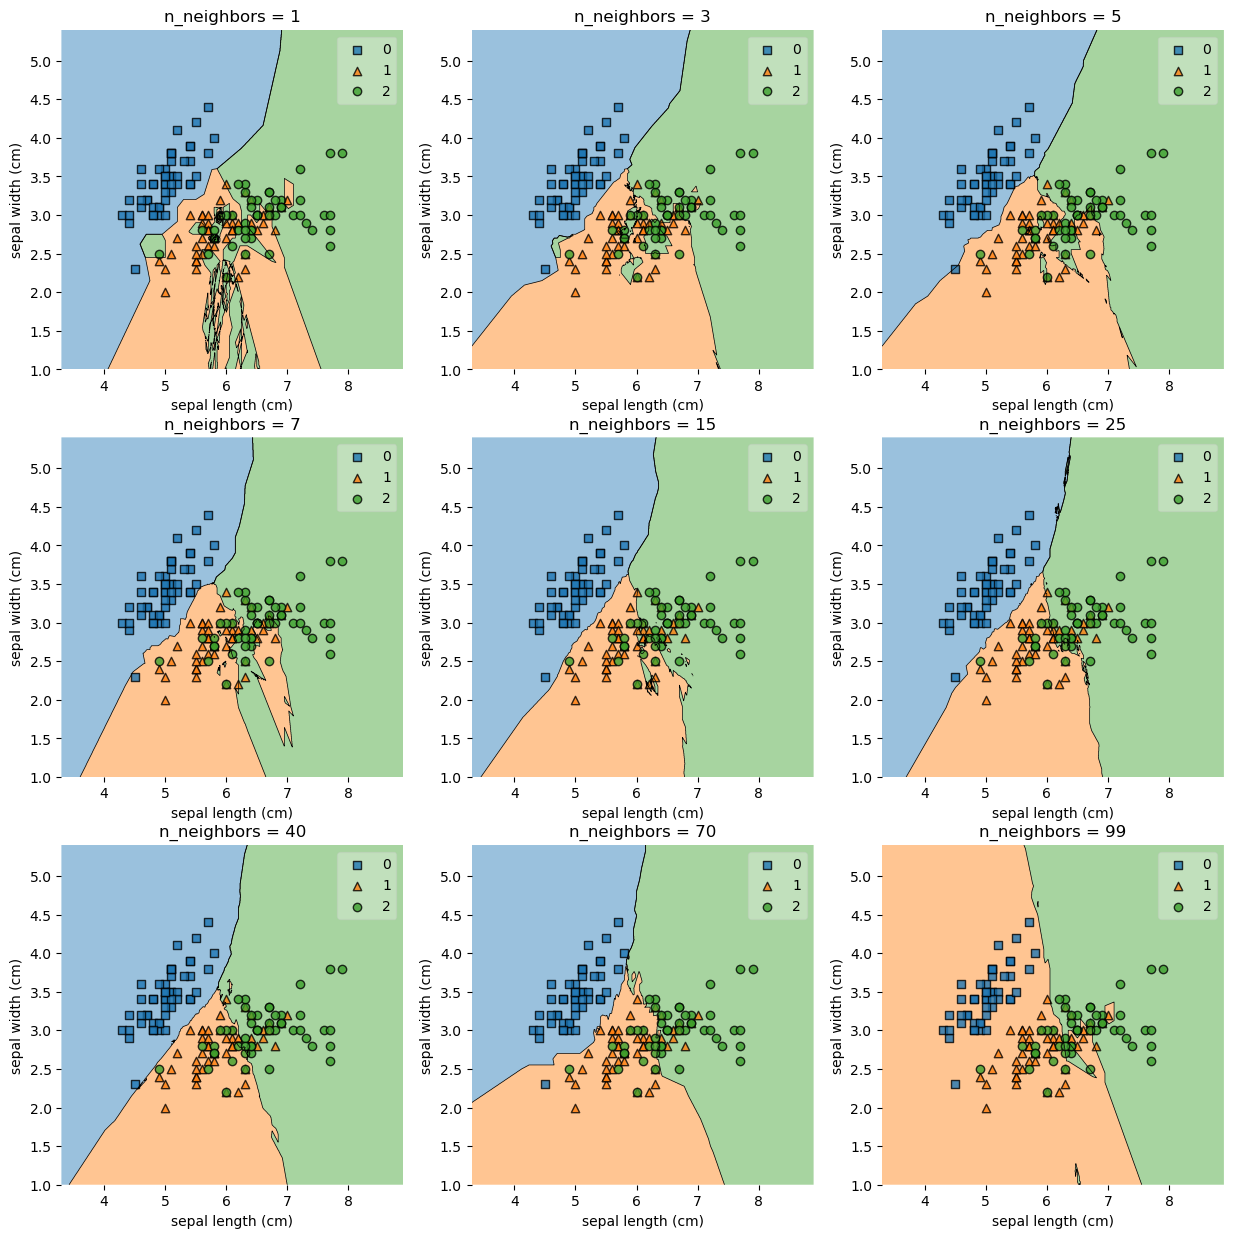

In [79]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = [1, 3, 5, 7, 15, 25, 40, 70 ,99]

num_plots = len(k_values); cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for idx, k in enumerate(k_values):
    knn = KNNClassifier(X_train.values, y_train.values, k=k, task='classification')

    knn.decision_boundary_plot(X, y, feature_indexes=[0, 1], ax= axes[idx // cols,idx % cols], title=f'n_neighbors = {k}')

plt.show()

#### 4. Comparison with Library Implementation

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k = 3  
my_knn = KNNClassifier(X_train.values, y_train.values, k=k, task='classification')
my_predictions = my_knn.predict(X_test.values)


sklearn_knn = KNeighborsClassifier(n_neighbors=k)
sklearn_knn.fit(X_train, y_train)
sklearn_predictions = sklearn_knn.predict(X_test)

# Comparison 
my_accuracy = accuracy_score(y_test, my_predictions)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"My KNN accuracy: {my_accuracy:.2f}")
print(f"Sklearn KNN accuracy: {sklearn_accuracy:.2f}")



My KNN accuracy: 0.74
Sklearn KNN accuracy: 0.74
